In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Test.zip to Test.zip


In [ ]:
import zipfile
zip_file_path = 'Test.zip'
extract_dir = '/content/sample_data'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall(extract_dir)

In [ ]:
train_dir = '/content/sample_data'

In [ ]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)
print(train_generator.class_indices)

Found 3000 images belonging to 6 classes.
{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define data generator with rescaling and other augmentations if needed
datagen = ImageDataGenerator(rescale=1./255)

# Specify the directory containing images and subfolders (each subfolder represents a class)
data_dir = '/content/sample_data'  # Modify path accordingly

# Generate batches of data with class labels assigned based on subfolder names
batch_size = 32
train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(150, 150),  # Resize images to 150x150
        batch_size=batch_size,
        class_mode='categorical')  # Use 'categorical' for multi-class classification

# Display class labels
print(train_generator.class_indices)


Found 3000 images belonging to 6 classes.
{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


ValueError: num must be an integer with 1 <= num <= 9, not 10

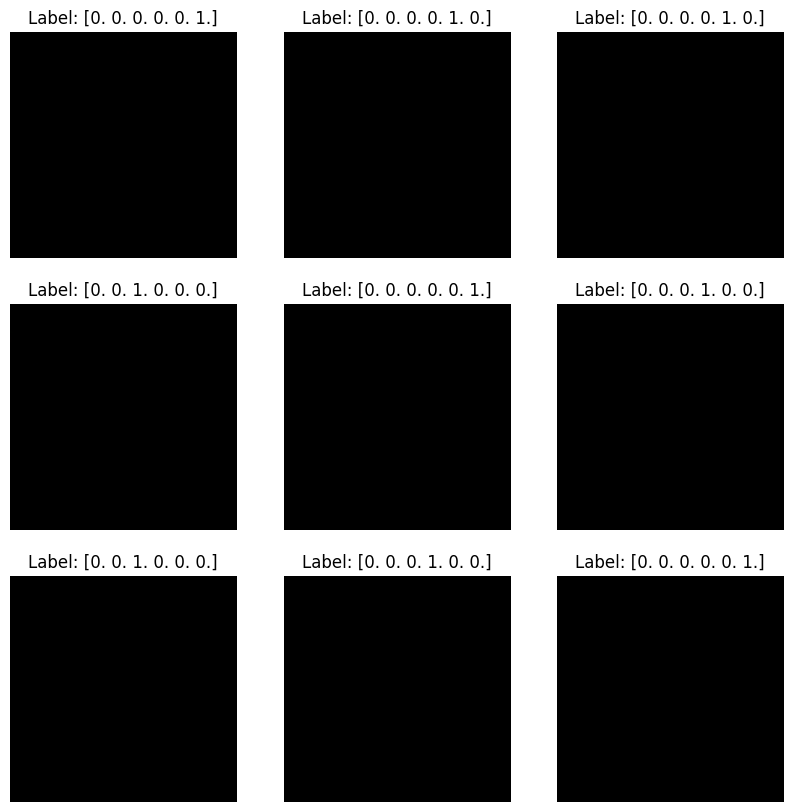

In [ ]:
import matplotlib.pyplot as plt

# Assuming train_generator is your DirectoryIterator object
batch_size = train_generator.batch_size

# Generate a batch of data
batch = next(train_generator)

# Extract images and labels from the batch
images, labels = batch

# Visualize the images
plt.figure(figsize=(10, 10))
for i in range(len(images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype("uint8"))  # Ensure images are in uint8 format for plotting
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory containing the images
train_dir = '/content/sample_data'

# Define image size and batch size
image_size = (150, 150)
batch_size = 32

# Create an ImageDataGenerator for preprocessing and augmentation
datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]

# Generate batches of data from the directory
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' mode for one-hot encoded labels
)

# Optionally, you can map class indices to class labels
class_labels = train_generator.class_indices
print(class_labels)  # This will print the mapping of class indices to class labels

# Extract X (input images) and Y (labels) from the generator
X, Y = train_generator.next()  # This will generate one batch of data

# Print the shapes of X and Y to verify
print("X shape:", X.shape)  # Should be (batch_size, height, width, channels)
print("Y shape:", Y.shape)  # Should be (batch_size, num_classes) if using 'categorical' class_mode

# Optionally, you can decode one-hot encoded labels back to class indices
import numpy as np
y_labels = np.argmax(Y, axis=1)
print(y_labels)  # This will print the class indices corresponding to the labels



Found 3000 images belonging to 6 classes.
{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
X shape: (32, 150, 150, 3)
Y shape: (32, 6)
[1 2 2 2 1 4 3 3 1 0 2 2 5 5 1 5 1 2 5 0 3 3 3 5 2 0 5 2 4 5 1 4]


In [ ]:
X.shape

(32, 150, 150, 3)

In [ ]:
Y.shape

(32, 6)

In [ ]:
X[1]

array([[[0.62352943, 0.7294118 , 0.8431373 ],
        [0.5803922 , 0.6862745 , 0.8000001 ],
        [0.5647059 , 0.6784314 , 0.7960785 ],
        ...,
        [0.37254903, 0.5647059 , 0.7843138 ],
        [0.35686275, 0.54901963, 0.77647066],
        [0.36862746, 0.56078434, 0.78823537]],

       [[0.64705884, 0.74509805, 0.86274517],
        [0.60784316, 0.7137255 , 0.82745105],
        [0.60784316, 0.7137255 , 0.8313726 ],
        ...,
        [0.4039216 , 0.59607846, 0.81568635],
        [0.39607847, 0.5882353 , 0.8078432 ],
        [0.40784317, 0.6       , 0.8196079 ]],

       [[0.67058825, 0.7607844 , 0.882353  ],
        [0.6431373 , 0.7411765 , 0.8588236 ],
        [0.64705884, 0.74509805, 0.86666673],
        ...,
        [0.42352945, 0.61960787, 0.82745105],
        [0.41176474, 0.6117647 , 0.8196079 ],
        [0.427451  , 0.627451  , 0.8352942 ]],

       ...,

       [[0.69803923, 0.7294118 , 0.7411765 ],
        [0.5686275 , 0.6       , 0.6117647 ],
        [0.21568629, 0

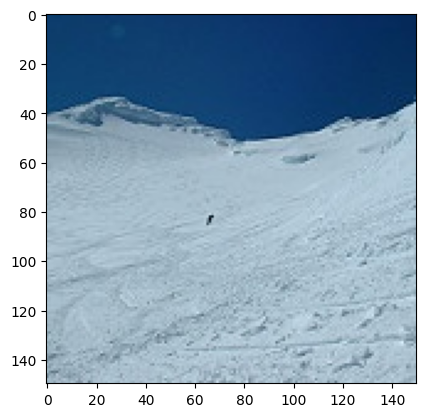

In [ ]:
# prompt: show image of X[1]

import matplotlib.pyplot as plt

# Show the image
plt.imshow(X[1])
plt.show()


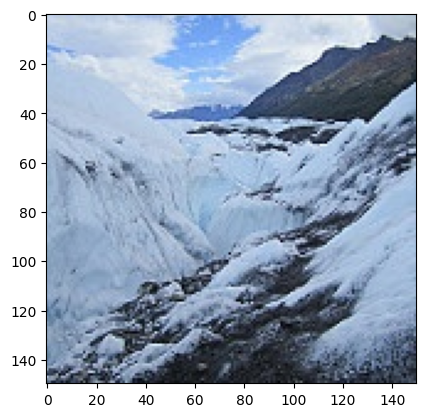

In [ ]:
plt.imshow(X[3])

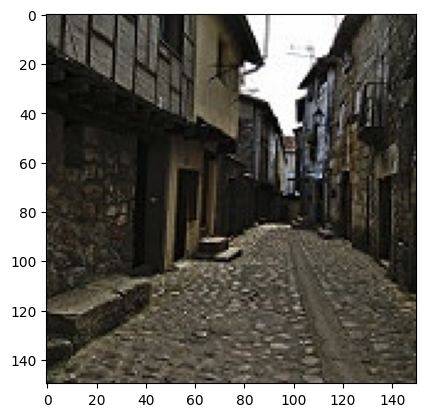

In [ ]:
plt.imshow(X[0])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
cnn = models.Sequential([
    # Convolutional, Pooling
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')  # Assuming 6 classes
])

# Compile the model
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model using the data generated from the directory
cnn.fit(train_generator, epochs=15)



Epoch 1/15
94/94 [==============================] - 103s 1s/step - loss: 1.4166 - accuracy: 0.4780
Epoch 2/15
94/94 [==============================] - 97s 1s/step - loss: 0.8567 - accuracy: 0.6867
Epoch 3/15
94/94 [==============================] - 99s 1s/step - loss: 0.6308 - accuracy: 0.7757
Epoch 4/15
94/94 [==============================] - 97s 1s/step - loss: 0.3989 - accuracy: 0.8543
Epoch 5/15
94/94 [==============================] - 97s 1s/step - loss: 0.2270 - accuracy: 0.9320
Epoch 6/15
94/94 [==============================] - 97s 1s/step - loss: 0.1205 - accuracy: 0.9653
Epoch 7/15
94/94 [==============================] - 95s 1s/step - loss: 0.0734 - accuracy: 0.9820
Epoch 8/15
94/94 [==============================] - 98s 1s/step - loss: 0.0366 - accuracy: 0.9933
Epoch 9/15
94/94 [==============================] - 96s 1s/step - loss: 0.0490 - accuracy: 0.9900
Epoch 10/15
94/94 [==============================] - 97s 1s/step - loss: 0.0421 - accuracy: 0.9890
Epoch 11/15
94/94 

In [ ]:
uploaded = files.upload()


Saving 20737.jpg to 20737.jpg


In [ ]:
new_image = '20737.jpg'

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Define the path to the new image you want to classify
new_image_path = '20057.jpg'

# Load and preprocess the new image
img = image.load_img(new_image_path, target_size=(150, 150))  # Adjust target_size as per your CNN's input shape
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize pixel values

# Perform classification
predictions = cnn.predict(img_array)

# Get the predicted class label
predicted_class = np.argmax(predictions[0])

# Print the predicted class label
print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 31ms/step
Predicted class: 0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
import zipfile
zip_file_path = 'Test.zip'
data_dir = '/content/sample_data/CNN'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall(data_dir)

In [ ]:
# Verify the contents of the directory
print("Directory of downloaded data:", data_dir)
print("Contents of the directory:")
print(os.listdir(data_dir))

Directory of downloaded data: /content/sample_data/CNN
Contents of the directory:
['street', 'sea', 'glacier', 'forest', 'mountain', 'buildings']


In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/sample_data/CNN')

In [ ]:
list(data_dir.glob('*/*jpg'))

[PosixPath('/content/sample_data/CNN/street/21678.jpg'),
 PosixPath('/content/sample_data/CNN/street/21510.jpg'),
 PosixPath('/content/sample_data/CNN/street/20162.jpg'),
 PosixPath('/content/sample_data/CNN/street/21137.jpg'),
 PosixPath('/content/sample_data/CNN/street/22801.jpg'),
 PosixPath('/content/sample_data/CNN/street/20474.jpg'),
 PosixPath('/content/sample_data/CNN/street/21494.jpg'),
 PosixPath('/content/sample_data/CNN/street/20535.jpg'),
 PosixPath('/content/sample_data/CNN/street/23052.jpg'),
 PosixPath('/content/sample_data/CNN/street/22017.jpg'),
 PosixPath('/content/sample_data/CNN/street/21007.jpg'),
 PosixPath('/content/sample_data/CNN/street/20331.jpg'),
 PosixPath('/content/sample_data/CNN/street/21499.jpg'),
 PosixPath('/content/sample_data/CNN/street/21724.jpg'),
 PosixPath('/content/sample_data/CNN/street/21572.jpg'),
 PosixPath('/content/sample_data/CNN/street/20642.jpg'),
 PosixPath('/content/sample_data/CNN/street/20944.jpg'),
 PosixPath('/content/sample_dat

In [ ]:
image_count = len(list(data_dir.glob('*/*jpg')))
image_count

3000

In [ ]:
street = list(data_dir.glob('street/*'))
street[:5]

[PosixPath('/content/sample_data/CNN/street/21678.jpg'),
 PosixPath('/content/sample_data/CNN/street/21510.jpg'),
 PosixPath('/content/sample_data/CNN/street/20162.jpg'),
 PosixPath('/content/sample_data/CNN/street/21137.jpg'),
 PosixPath('/content/sample_data/CNN/street/22801.jpg')]

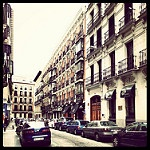

In [ ]:
PIL.Image.open(str(street[30]))

In [ ]:
sea = list(data_dir.glob('sea/*'))
sea[:5]

[PosixPath('/content/sample_data/CNN/sea/22675.jpg'),
 PosixPath('/content/sample_data/CNN/sea/21624.jpg'),
 PosixPath('/content/sample_data/CNN/sea/23293.jpg'),
 PosixPath('/content/sample_data/CNN/sea/21638.jpg'),
 PosixPath('/content/sample_data/CNN/sea/20834.jpg')]

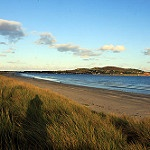

In [ ]:
PIL.Image.open(str(sea[2]))

In [ ]:
glacier = list(data_dir.glob('glacier/*'))
glacier[:5]

[PosixPath('/content/sample_data/CNN/glacier/22130.jpg'),
 PosixPath('/content/sample_data/CNN/glacier/23870.jpg'),
 PosixPath('/content/sample_data/CNN/glacier/20406.jpg'),
 PosixPath('/content/sample_data/CNN/glacier/23296.jpg'),
 PosixPath('/content/sample_data/CNN/glacier/22869.jpg')]

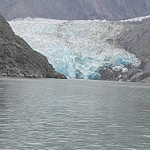

In [ ]:
PIL.Image.open(glacier[2])

In [ ]:
forest = list(data_dir.glob('forest/*'))

In [ ]:
mountain = list(data_dir.glob('mountain/*'))

In [ ]:
buildings = list(data_dir.glob('buildings/*'))

In [ ]:
image_dic = {
    'street' : list(data_dir.glob('street/*')),
    'sea' : list(data_dir.glob('sea/*')),
    'glacier' : list(data_dir.glob('glacier/*')),
    'forest' : list(data_dir.glob('forest/*')),
    'mountain' : list(data_dir.glob('mountain/*')),
    'buildings' : list(data_dir.glob('buildings/*')),
}

In [ ]:
lables_dic = {
    'street': 0,
    'sea' : 1,
    'glacier' : 2,
    'forest' : 3,
    'mountain' : 4,
    'buildings' : 5
}

In [ ]:
image_dic['mountain'][20]

PosixPath('/content/sample_data/CNN/mountain/20085.jpg')

array([[[255, 255, 254],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [240, 224, 207],
        [244, 227, 208],
        [246, 229, 210]],

       [[254, 255, 253],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [242, 226, 209],
        [243, 227, 210],
        [245, 230, 211]],

       [[254, 255, 253],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [241, 226, 210],
        [241, 226, 210],
        [242, 228, 210]],

       ...,

       [[ 85,  95, 102],
        [ 84,  94, 101],
        [111, 120, 124],
        ...,
        [  5,  27,  25],
        [ 32,  51,  54],
        [ 60,  79,  82]],

       [[ 75,  84,  93],
        [ 69,  79,  86],
        [ 69,  77,  84],
        ...,
        [ 15,  37,  32],
        [ 40,  58,  57],
        [ 58,  76,  75]],

       [[ 31,  40,  49],
        [ 53,  62,  71],
        [ 45,  53,  60],
        ...,
        [ 25,  46,  38],
        [ 52,  69,  66],
        [ 68,  85,  82]]], dtype=uint8)
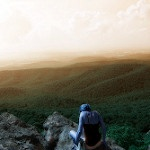

In [ ]:
img= cv2.imread(str(image_dic['mountain'][20]))
img

In [ ]:
img.shape

(150, 150, 3)

In [ ]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

I was expecting the resize command to change the size of the image. But it did not. I am missing something.

array([[[255, 255, 254],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [240, 224, 207],
        [244, 227, 208],
        [246, 229, 210]],

       [[254, 255, 253],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [242, 226, 209],
        [243, 227, 210],
        [245, 230, 211]],

       [[254, 255, 253],
        [254, 255, 253],
        [254, 255, 253],
        ...,
        [241, 226, 210],
        [241, 226, 210],
        [242, 228, 210]],

       ...,

       [[ 85,  95, 102],
        [ 84,  94, 101],
        [111, 120, 124],
        ...,
        [  5,  27,  25],
        [ 32,  51,  54],
        [ 60,  79,  82]],

       [[ 75,  84,  93],
        [ 69,  79,  86],
        [ 69,  77,  84],
        ...,
        [ 15,  37,  32],
        [ 40,  58,  57],
        [ 58,  76,  75]],

       [[ 31,  40,  49],
        [ 53,  62,  71],
        [ 45,  53,  60],
        ...,
        [ 25,  46,  38],
        [ 52,  69,  66],
        [ 68,  85,  82]]], dtype=uint8)
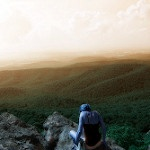

In [ ]:
img

In [ ]:
X, y = [], []

for